# Linear Regression

## Classical (frequentist) description

_Adapted from Josep Fortiana (2023-03-13) by Jordi Abante (2024-04-15)_

# 01. Simple linear regression: A simulated example

### Generate a simulated dataset for simple linear regression

In [1]:
# More or less arbitrary parameters for the data generation
trueA<-1
trueB<-5
trueSd<-15
sampleSize<-20 # n = sampleSize

In [2]:
# Uniformly spread x values in the interval [-n/2,n/2]
x<-(-(sampleSize-1)/2):((sampleSize-1)/2)
# y values of the form a + b*x + N(0,trueSd)
set.seed(123123)
y<-trueA+trueB*x+rnorm(n=sampleSize,mean=0,sd=trueSd)

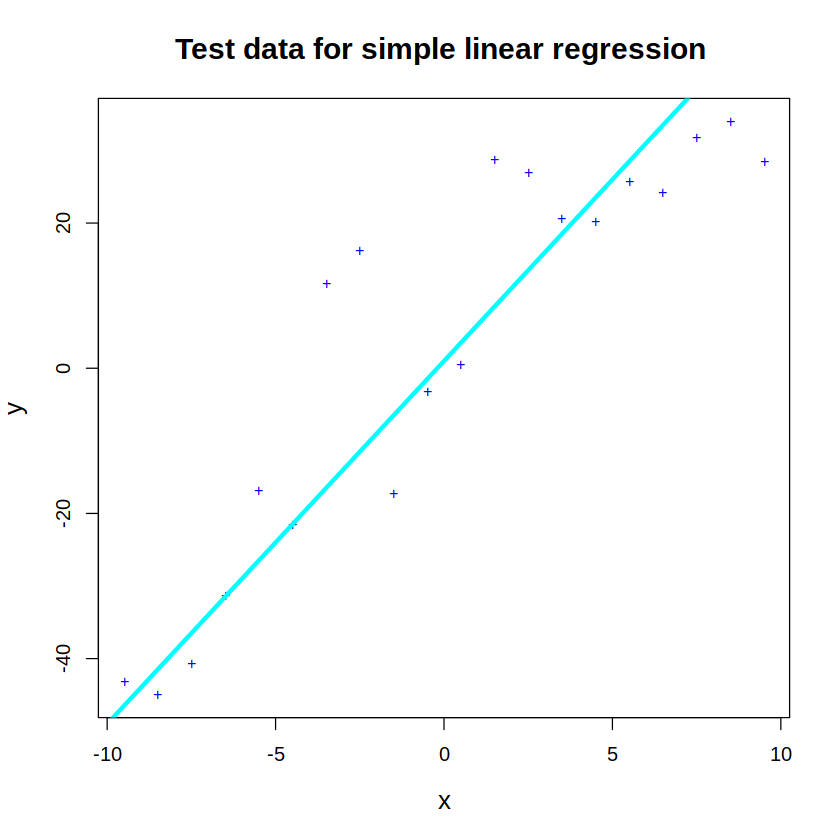

In [3]:
# Plot data points plus the line used in the generation
# Note this line is NOT a regression line, which will be computed below
options(repr.plot.width=7, repr.plot.height=7)
plot(x,y,pch='+',cex=0.8,col="blue",main="Test data for simple linear regression ",cex.lab=1.3,cex.main=1.5)
abline(trueA,trueB,lwd=3.5,col="cyan")

### Adjust a least squares linear regression model

In a simple LS regression model we are optimizing the square of the residuals:

$$
L(D, \boldsymbol{\beta})=\|Y-X \boldsymbol{\beta}\|^2
$$

In R, we can do this using the `lm` function:

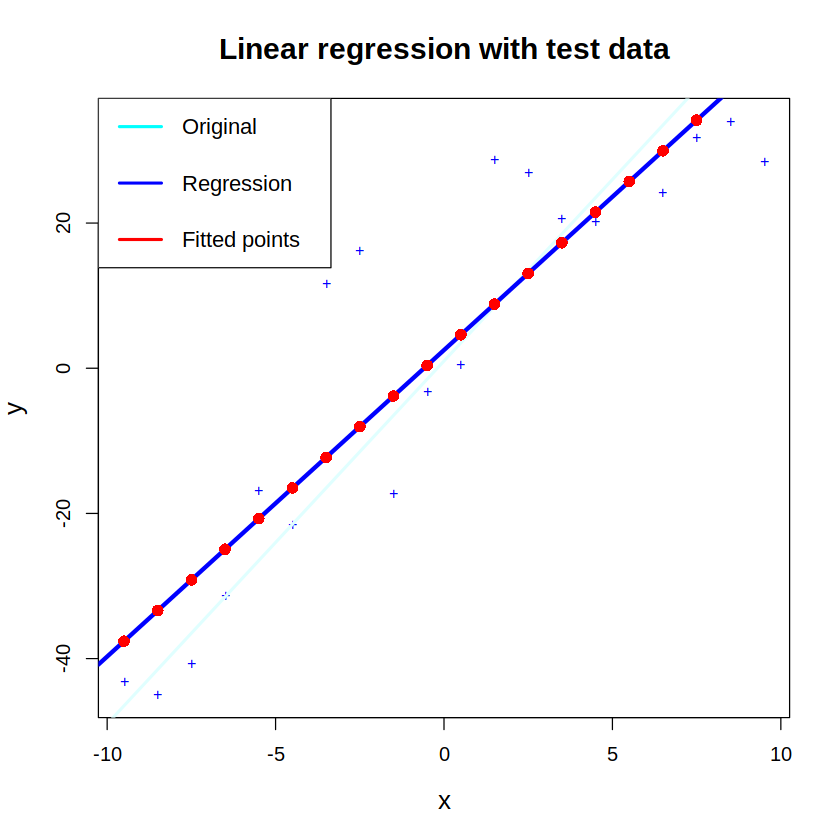

In [4]:
lm.1<-lm(y~x)
options(repr.plot.width=7, repr.plot.height=7)
plot(x,y,pch='+',cex=0.8,col="blue",main="Linear regression with test data",cex.lab=1.3,cex.main=1.5)
yhat<-fitted.values(lm.1)
abline(trueA,trueB,lwd=2.5,col="LightCyan")
abline(lm.1,lwd=3.5,col="blue")
points(x,yhat,pch=16,col="red",cex=1.3)
legend("topleft",c("Original    ","","Regression   ","","Fitted points"), lwd=2.5,
       col=c("cyan","white","blue","white","red"),cex=1.1)

### Extract information from the fitted model

In [5]:
print(lm.1)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
      2.507        4.222  



One of the most important quantities of a regression is the residuals:

$$
R_i=Y_i-\hat{Y}_i
$$

We can check their quantiles using the `summary` function.

In [6]:
summary(lm.1)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.140  -5.951  -3.854   3.507  24.248 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.5066     2.6939   0.930    0.364    
x             4.2224     0.4672   9.038 4.13e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.05 on 18 degrees of freedom
Multiple R-squared:  0.8194,	Adjusted R-squared:  0.8094 
F-statistic: 81.69 on 1 and 18 DF,  p-value: 4.135e-08


This summary also gives us more information: 

1. t-test for each coefficient in the model telling us whether the corresponding covariate is linearly related to the response

2. multiple and adjusted $R^2$ quantify how much of the variability the model explains 

3. F-statistic for the variability explained by the entire model telling us whether our model explains the data significantly better than just a simple mean

### Regression coefficients

In R, we can extract the coefficients of a regression model using the `coefficients` function_

In [7]:
Coeff<-coefficients(lm.1)
a.hat<-Coeff[1]
b.hat<-Coeff[2]
round(a.hat,3)
round(b.hat,3)

(Intercept) 
      2.507

x 
4.222

### Predict the response for a new $\tilde{x}$

We can also predict the response $\hat{y}$ for a new $\tilde{x}$ using the `predict` function:

In [8]:
x.tilde<-c(2.5,3)  # just for example
newx<-data.frame(x=x.tilde)

In [9]:
# Only predicted response
predict(lm.1,newdata=newx)

1        2 
13.06277 15.17400

By default for linear models `type=response`. We can obtain a confidence interval *for the mean* using:

In [10]:
# Response + a confidence interval
predict(lm.1,newdata=newx,interval = "confidence")

,fit,lwr,upr
1,13.06277,6.894112,19.23143
2,15.17400,8.794218,21.55377


We can also obtain a confidence interval *for a prediction* using:

In [11]:
predict(lm.1,newdata=newx,interval="prediction")

,fit,lwr,upr
1,13.06277,-12.98873,39.11427
2,15.17400,-10.92830,41.27629


Confidence intervals for predicted values, including the $\textrm{N}(0,\sigma^{2})$ fluctuation around $\hat{Y}$ (so the results are wider intervals). See [this reference](https://rpubs.com/aaronsc32/regression-confidence-prediction-intervals) for a detailed explanation on how these intervals are derived.

# 02. The `Advertising` dataset

Here we will be using an example from [An Introduction to Statistical Learning with Applications in R (ISLR)](https://www.statlearning.com/). We downloaded the file [`Advertising.csv`](https://www.statlearning.com/s/Advertising.csv) from the textbook web page. In this section we follow the treatment of the `Advertising` dataset from chapters 2 and 3.

Suppose that we are statistical consultants hired by a client to **investigate  the  association  between advertising  and  sales**  of  a  particular product. The  `Advertising`  data  set  consists  of  the sales  of  that  product in **200 different markets**, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper. 

It  is  not  possible  for  our client  to directly increase sales of the product. On the other hand, **they can control the advertising expenditure** in  each  of  the  three  media.  Therefore,  if  we determine that there is an association between advertising and sales, then we can instruct our client to adjust advertising budgets, thereby indirectly increasing sales.

In other words, our goal is to develop an accurate model that can be used to predict sales on the basis of the three media budgets.
In this setting, the advertising budgets are  input  variables  while sales is an output  variable. 
The input variables are typically denoted using the symbol $X$, with a subscript to distinguish them. So $ X_{1}$ might be the TV budget, 
$X_{2}$ the radio  budget, and $X_{3}$ the newspaper  budget. The inputs go by different names, such as _predictors,_
_independent variables,_ _features,_ or sometimes just _variables._ The output variable —in this case, sales— is often 
called the _response_  or _dependent  variable,_ and is typically denoted using the symbol $Y$.

### Read dataset.

Omit first column, the index of each sample. If needed it could be recovered by: `row.names(Advertising)`.

In [5]:
Advertising <- read.csv("Data/Advertising.csv")
#Advertising<-read.csv("https://www.statlearning.com/s/Advertising.csv")
Advertising<-Advertising[,-1]

## 02.01. Pairwise simple linear regressions

Following ISLR, Chapter 3:

1. Compute simple linear regressions, one for each of the predictors, `TV`, `Radio`, `Newspapers`. 

2. Plot all three scatterplots, superimposing on them the regression line.

### TV

In [7]:
lm.TV<-lm(Sales~TV,data=Advertising)
summary(lm.TV)


Call:
lm(formula = Sales ~ TV, data = Advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


We can also extract the R2 from the summary:

In [16]:
# Extract R2 and adjusted R2 from the summary.lm object
R2.TV<-summary(lm.TV)$r.squared
adj.R2.TV<-summary(lm.TV)$adj.r.squared
round(R2.TV,3)
round(adj.R2.TV,3)

[1] 0.612

[1] 0.61

Although the linear model includes an ANOVA analysis, we can get the table with the SSs using the anova command:

In [8]:
# Obtain ANOVA table
anova(lm.TV)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TV,1,3314.618,3314.61817,312.145,1.46739e-42
Residuals,198,2102.531,10.61884,NA,NA


Thus, according to the F statistic there is a significant difference in the sales as a function of the TV advertising budget. Note that the residual SS is still large - hence the 40% unexplained variance according to the $R^2$.

In [20]:
# And, from it, the residual sum of squares
ResSS.TV<-anova(lm.TV)$"Sum Sq"[2]
round(ResSS.TV,3)

[1] 2102.531

In [21]:
# And the regression sum of squares
RegSS.TV<-anova(lm.TV)$"Sum Sq"[1]
round(RegSS.TV,3)

[1] 3314.618

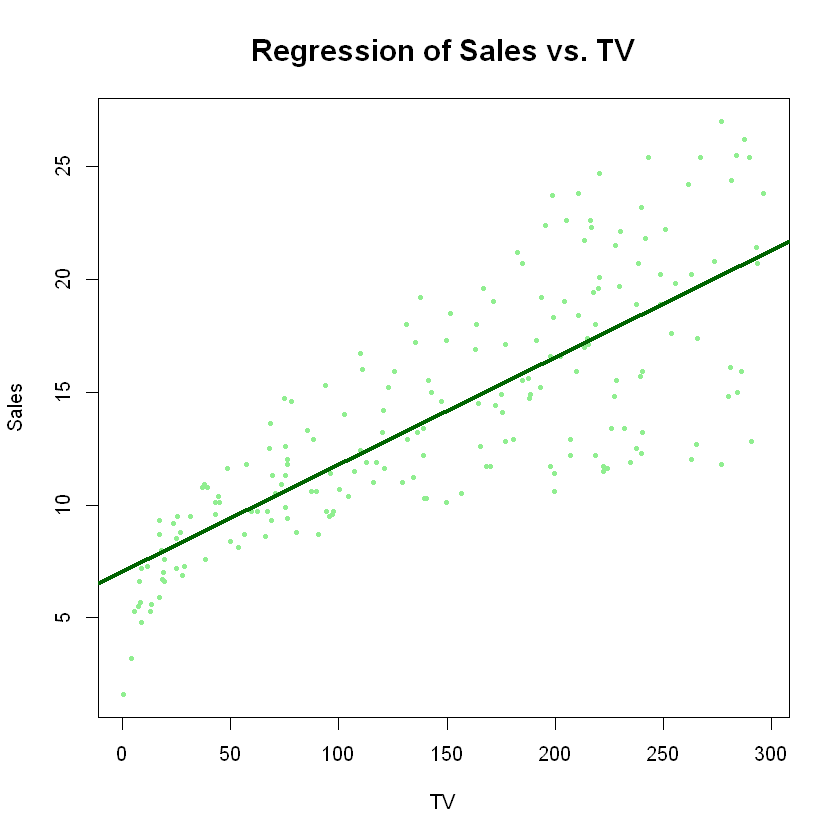

In [22]:
# Scatterplot plus regression line
options(repr.plot.width=7, repr.plot.height=7)
plot(Sales~TV,data=Advertising,pch=19,col="LightGreen",cex=0.5,main="Regression of Sales vs. TV",cex.main=1.5)
abline(lm.TV,lwd=3.5,col="DarkGreen")

### Radio

In [9]:
lm.Radio<-lm(Sales~Radio,data=Advertising)
summary(lm.Radio)


Call:
lm(formula = Sales ~ Radio, data = Advertising)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7305  -2.1324   0.7707   2.7775   8.1810 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.31164    0.56290  16.542   <2e-16 ***
Radio        0.20250    0.02041   9.921   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.275 on 198 degrees of freedom
Multiple R-squared:  0.332,	Adjusted R-squared:  0.3287 
F-statistic: 98.42 on 1 and 198 DF,  p-value: < 2.2e-16


In [26]:
# Extract R2 and adjusted R2 from the summary.lm object
R2.Radio<-summary(lm.Radio)$r.squared
adj.R2.Radio<-summary(lm.Radio)$adj.r.squared
round(R2.Radio,3)
round(adj.R2.Radio,3)

[1] 0.332

[1] 0.329

We also see that radio advertising contributes significantly to explaining the observed variability in sales according to the ANOVA analysis:

In [27]:
# Obtain ANOVA table
anova(lm.Radio)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Radio,1,1798.669,1798.66920,98.42159,4.354966e-19
Residuals,198,3618.480,18.27515,NA,NA


In [30]:
# And, from it, the residual sum of squares
ResSS.Radio<-anova(lm.Radio)$"Sum Sq"[2]
round(ResSS.Radio,3)

[1] 3618.48

In [31]:
# And the regression sum of squares
RegSS.Radio<-anova(lm.Radio)$"Sum Sq"[1]
round(RegSS.Radio,3)

[1] 1798.669

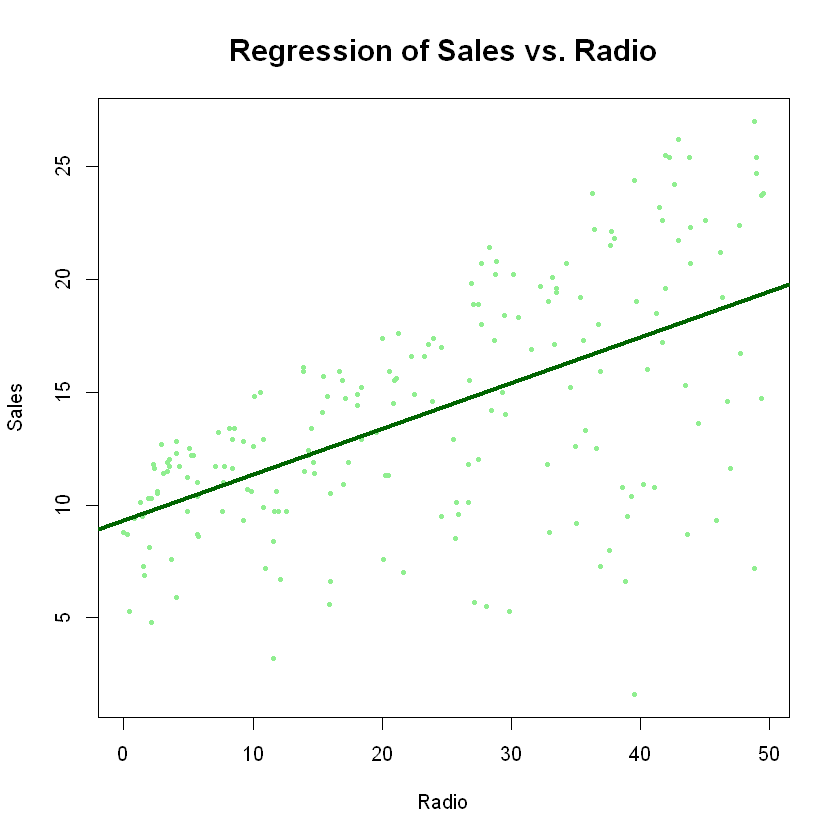

In [32]:
# Scatterplot plus regression line
options(repr.plot.width=7, repr.plot.height=7)
plot(Sales~Radio,data=Advertising,pch=19,col="LightGreen",cex=0.5,main="Regression of Sales vs. Radio",cex.main=1.5)
abline(lm.Radio,lwd=3.5,col="DarkGreen")

### Newspaper

In [33]:
lm.Newspaper<-lm(Sales~Newspaper,data=Advertising)
summary(lm.Newspaper)


Call:
lm(formula = Sales ~ Newspaper, data = Advertising)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2272  -3.3873  -0.8392   3.5059  12.7751 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.35141    0.62142   19.88  < 2e-16 ***
Newspaper    0.05469    0.01658    3.30  0.00115 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.092 on 198 degrees of freedom
Multiple R-squared:  0.05212,	Adjusted R-squared:  0.04733 
F-statistic: 10.89 on 1 and 198 DF,  p-value: 0.001148


In [36]:
# Extract R2 and adjusted R2 from the summary.lm object
R2.Newspaper<-summary(lm.Newspaper)$r.squared
adj.R2.Newspaper<-summary(lm.Newspaper)$adj.r.squared
round(R2.Newspaper,3)
round(adj.R2.Newspaper,3)

[1] 0.052

[1] 0.047

In [37]:
# Obtain ANOVA table
anova(lm.Newspaper)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Newspaper,1,282.3442,282.34421,10.8873,0.001148196
Residuals,198,5134.8045,25.93336,NA,NA


In [40]:
# And, from it, the residual sum of squares
ResSS.Newspaper<-anova(lm.Newspaper)$"Sum Sq"[2]
round(ResSS.Newspaper,3)

[1] 5134.805

In [41]:
# And the regression sum of squares
RegSS.Newspaper<-anova(lm.Newspaper)$"Sum Sq"[1]
round(RegSS.Newspaper,3)

[1] 282.344

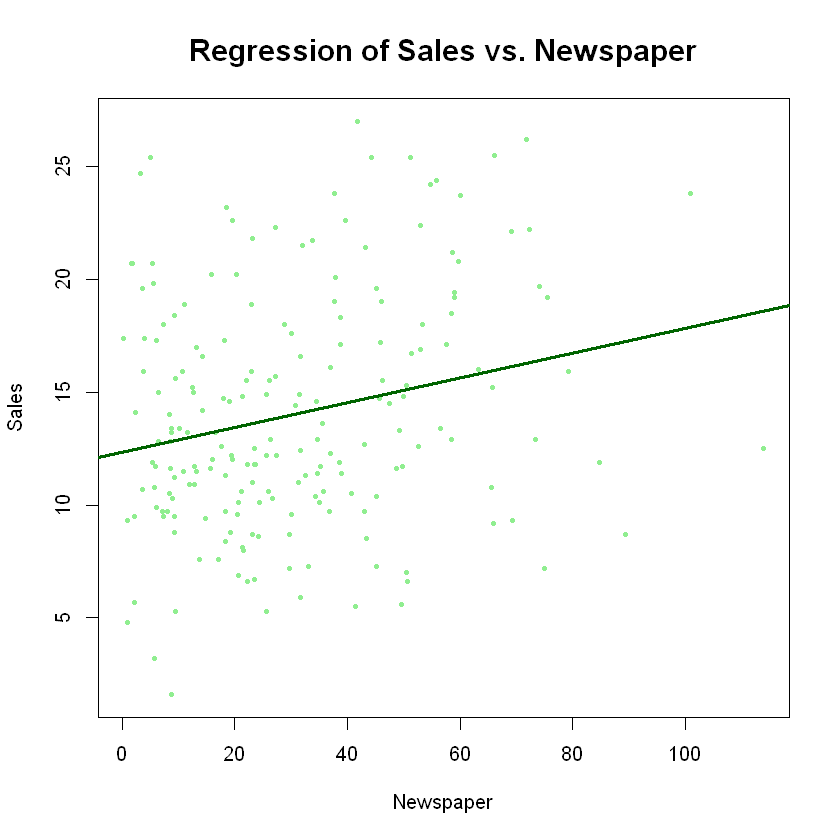

In [42]:
# Scatterplot plus regression line
options(repr.plot.width=7, repr.plot.height=7)
plot(Sales~Newspaper,data=Advertising,pch=19,col="LightGreen",cex=0.5,main="Regression of Sales vs. Newspaper",cex.main=1.5)
abline(lm.Newspaper,lwd=3.0,col="DarkGreen")

Questions:

1. What can be said about goodness-of-fit of these models?

2. Which variable, of the possible predictors, `TV`, `Radio`, `Newspapers`, is a better predictor of `Sales`?

## 02.02. Multiple regression

When working with multiple features it is important to study possible correlations between them since large correlations can lead to problematic colinearities during model fitting and interpretation. Qualitatively, we can do so through a grid of scatter plots and quantify it through computing correlations between covariates.

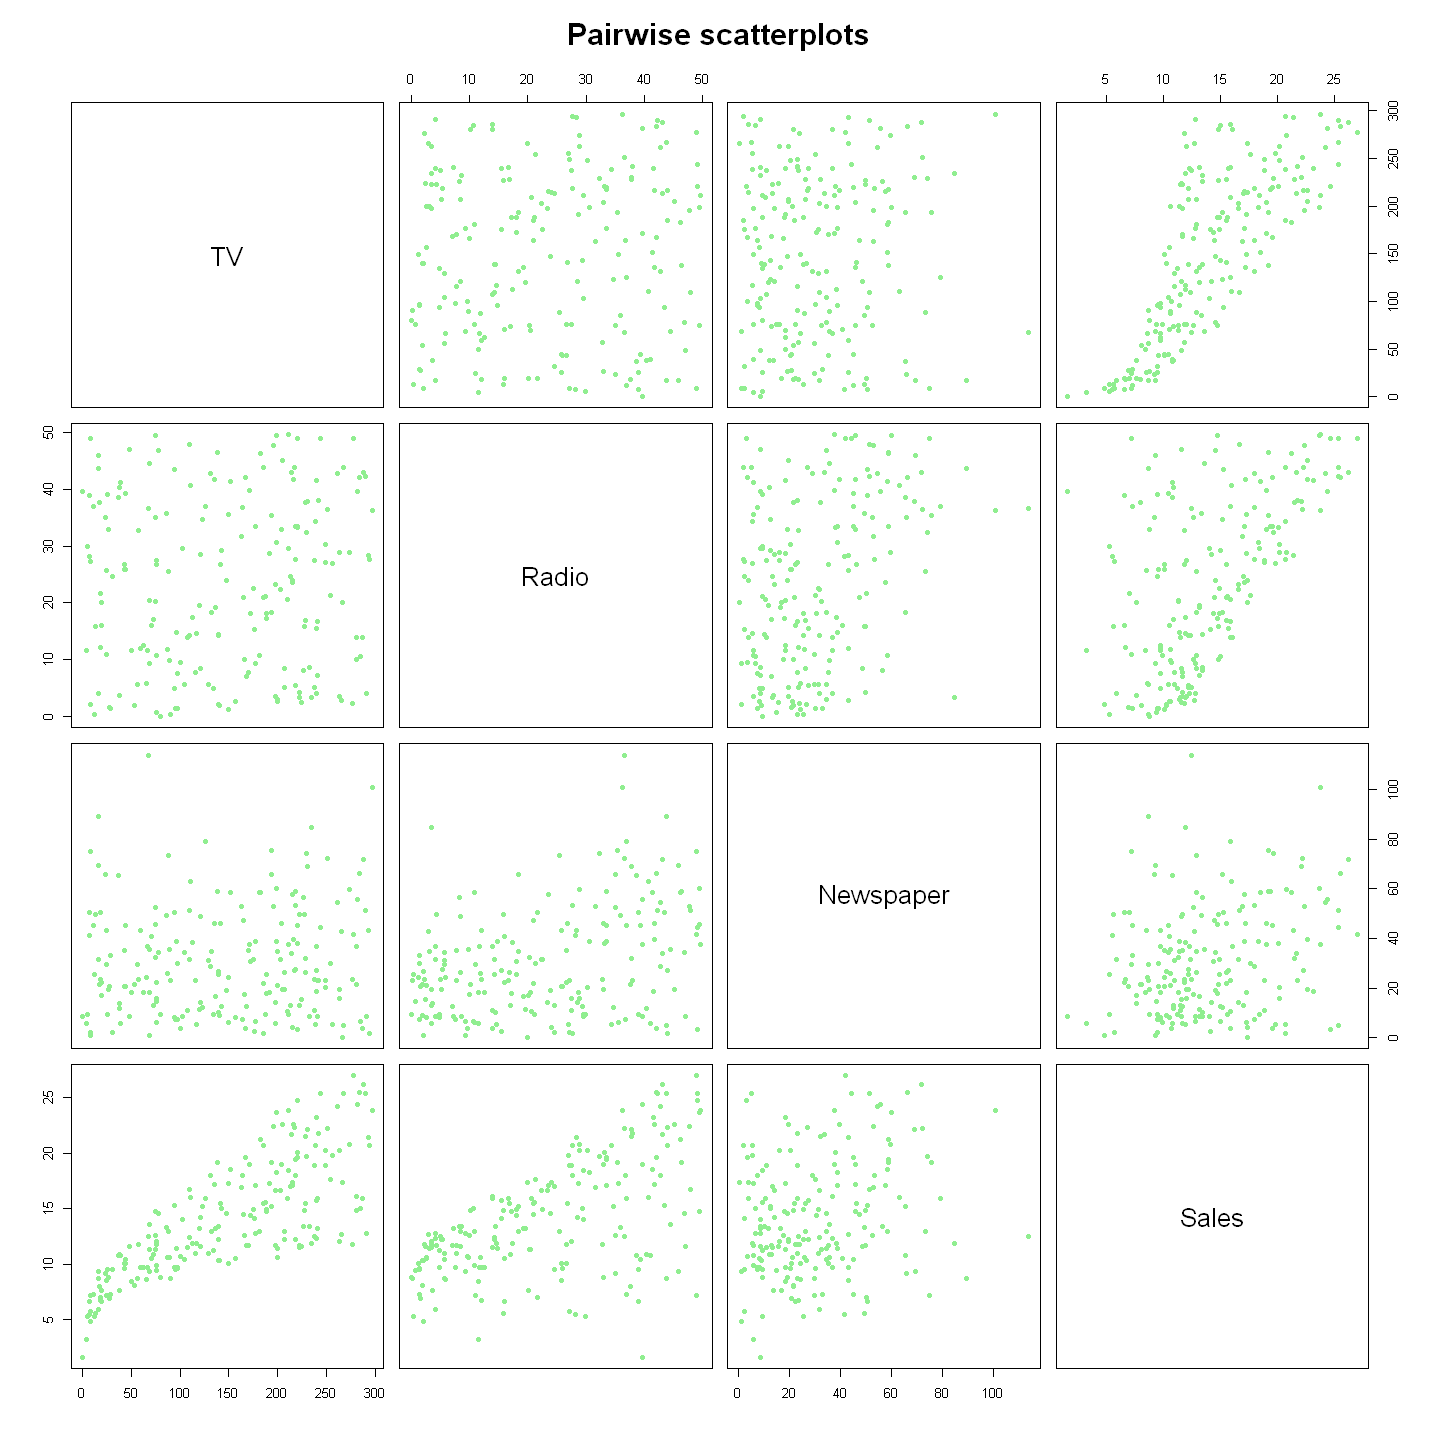

In [43]:
options(repr.plot.width=12, repr.plot.height=12)
plot(Advertising,pch=19,col="LightGreen",cex=0.8,main="Pairwise scatterplots",cex.main=1.5)

In [10]:
round(cor(Advertising),2)

,TV,Radio,Newspaper,Sales
TV,1.00,0.05,0.06,0.78
Radio,0.05,1.00,0.35,0.58
Newspaper,0.06,0.35,1.00,0.23
Sales,0.78,0.58,0.23,1.00


In [13]:
# install.packages("corrplot",dependencies=TRUE,repos= "https://cloud.r-project.org")
require(corrplot,quietly=TRUE)

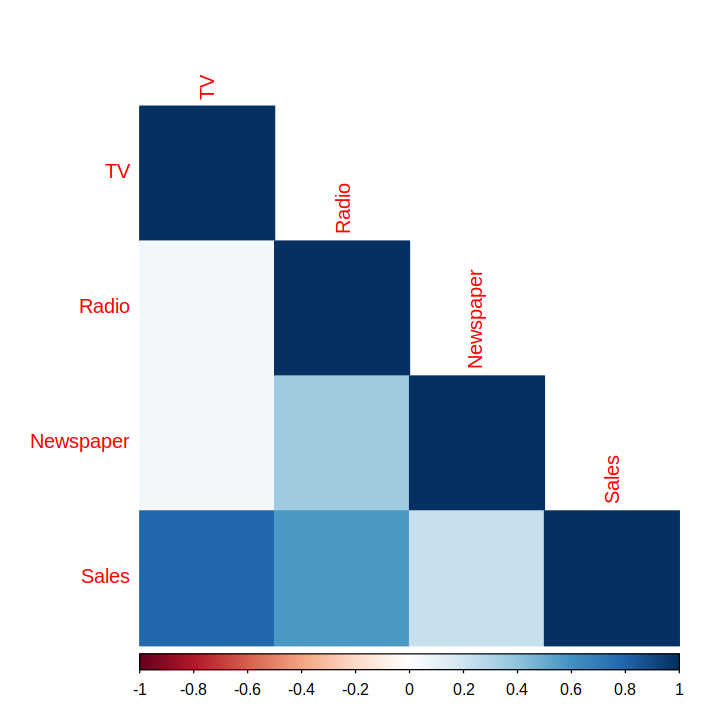

In [14]:
options(repr.plot.width=6, repr.plot.height=6)
corrplot(cor(Advertising),method="color",type="lower")

Multiple linear regression of Sales on all three predictors

In [15]:
lm.Advertising.01<-lm(Sales~TV+Radio+Newspaper,data=Advertising)
summary(lm.Advertising.01)


Call:
lm(formula = Sales ~ TV + Radio + Newspaper, data = Advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8277 -0.8908  0.2418  1.1893  2.8292 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.938889   0.311908   9.422   <2e-16 ***
TV           0.045765   0.001395  32.809   <2e-16 ***
Radio        0.188530   0.008611  21.893   <2e-16 ***
Newspaper   -0.001037   0.005871  -0.177     0.86    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.686 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16


To compare the fits of two models, you can use the `anova()` function. This function will return an ANOVA testing whether the more complex model is significantly better at capturing the data than the simpler model. In this case, it will compare a model with and without each covariate, while keeping the rest of covariates in the model. If the resulting p-value is sufficiently low (usually less than 0.05), we conclude that the more complex model is significantly better than the simpler model, and thus favor the more complex model. If the p-value is not sufficiently low (usually greater than 0.05), we should favor the simpler model.

In [48]:
anova(lm.Advertising.01)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TV,1,3.314618e+03,3.314618e+03,1.166731e+03,1.809337e-84
Radio,1,1.545617e+03,1.545617e+03,5.440501e+02,1.882722e-58
Newspaper,1,8.871717e-02,8.871717e-02,3.122805e-02,8.599151e-01
Residuals,196,5.568253e+02,2.840945e+00,NA,NA


We can see that the overall residual SS is smaller than in the individual model, suggesting the model explains more variability - hence the $R^2=89\%$. In addition we see that every single advertising avenue significantly contributes to explaining the observed variability in sales.

# 03. Relevant quantities in a regression

Rename response and model for the sake of pithy expressions

In [16]:
y<-Advertising$Sales
n<-length(y)
n

[1] 200

In [17]:
lm.1<-lm.Advertising.01

## 03.01. Total Sum of Squares and centered Total Sum of Squares

In [18]:
# Total sum of squares
TotalSS<-sum(y^2)
round(TotalSS,3)
# Centered data
y0<-y-mean(y)   
# Centered total sum of squares
TotalSS0<-sum(y0^2)        
round(TotalSS0,3)

[1] 44743.25

[1] 5417.149

Degrees of freedom of uncentered vs centered response.

In [20]:
# Total number of degrees of freedom
n<-length(y)
Totaldf<-n
# Total number of degrees of freedom of the centered y
Totaldf0<-n-1
Totaldf
Totaldf0

[1] 200

[1] 199

## 03.02. Fitted values: Regression Sum of Squares and centered Regression Sum of Squares

In [21]:
# Fitted values
yhat<-fitted.values(lm.1)
#yhat<-as.numeric(lm.1$fitted.values) # Alternative syntax
# Centered fitted values
yhat0<-yhat-mean(yhat)

Check that `mean(y)` coincides with `mean(yhat)`

In [22]:
# Regression Sum of Squares
RegSS<-sum(yhat^2)
round(RegSS,3)
# Centered Regression Sum of Squares
RegSS0<-sum(yhat0^2)
round(RegSS0,3)

[1] 44186.43

[1] 4860.323

In [23]:
# Number of degrees of freedom of the regression
# = Number of predictors (including intercept)
Regdf<-length(lm.1$coefficients)
# Number of degrees of freedom of the regression (centered)
Regdf0<-Regdf-1

Regdf
Regdf0

[1] 4

[1] 3

## 03.03. Regression residuals and Residual Sum of Squares

In [58]:
# The regression residuals can be extracted as:
ytilde<-residuals(lm.1)
# ytilde<-as.numeric(lm.11$residuals) # Alternative syntax
# Also: 
# ytilde<-y-yhat 
# or
# ytilde<-y0-yhat0
#
# Note that, since both y and yhat have the same mean, regression residuals are centered.
ResSS<-sum(ytilde^2)

round(sum(ytilde),8)

[1] 0

In [59]:
Resdf<-Totaldf0-Regdf0
round(ResSS,3)
Resdf

[1] 556.825

[1] 196

## 03.04. Pythagoras
## [Total Sum of Squares]  =  [Regression Sum of Squares]  +  [Residual Sum of Squares]

In [60]:
# Both with the non-centered and with the centered version
round(TotalSS-(RegSS+ResSS),10)
round(TotalSS0-(RegSS0+ResSS),10)

[1] 0

[1] 0

## 03.05. Regression Coefficient of Determination (Multiple R-squared)

In [61]:
# By definition, with the centered sums of squares
R2<-RegSS0/TotalSS0
round(R2,4)

[1] 0.8972

## 03.06. Adjusted Coefficient of Determination (Adjusted for the number $p$ of predictors)

The Adjusted Coefficient of Determination is also equal to:

$$
    {\displaystyle {\bar {R}}^{2}={1-{SS_{\text{res}}/{\text{df}}_{e} \over SS_{\text{tot}0}/{\text{df}}_{t0}}}}={\bar {R}}^{2}=1-(1-R^{2})\dfrac{n-1}{n-p-1}
$$

In [62]:
p<-Regdf0   # When p=1 the adjustment factor is 1
R2adj.1<-1-(1-R2)*(n-1)/(n-p-1)
round(R2adj.1,4)
R2adj.2<-1-(ResSS/Resdf)/(TotalSS0/Totaldf0)
round(R2adj.1,4)

[1] 0.8956

[1] 0.8956

## 03.07. Mean squares and regression F statistic

The quotient F is a measure of by how much _Regression Mean Squares_ exceeds _Residual Mean of Squares._ Its purpose is to measure how large is "regression" as compared to "residuals" (per degree of freedom), meaning how "decent" is the model (a model where residuals are proportionally large is useless, everything is noise)

In [63]:
TotalMeanS0<-TotalSS0/Totaldf0
RegMeanS0<-RegSS0/Regdf0
ResMeanS<-ResSS/Resdf    # Remember that residuals are centered (hence there is no need of a "0" here)
F<-RegMeanS0/ResMeanS
round(TotalMeanS0,3)
round(RegMeanS0,3)
round(ResMeanS,3)
#
round(F,3)

[1] 27.222

[1] 1620.108

[1] 2.841

[1] 570.271

When the model is a **Gauss-Markov normal regression** (meaning that individual responses are normal, uncorrelated, and with equal variance) this quantity follows a Fisher-Snedecor distribution  $\sim\textrm{F}(\,\text{Regdf0},\,\text{Resdf}\,)$ with degrees of freedom `Regdf0` and `Resdf`. The resulting $p$-value is computed assuming this is true. When it is larger than the standard significance level ($p$-value > 0.05) we conclude the regression model is non-significant. Note that individual observations $y_{i}$ in a linear model cannot have _equal distribution,_ as their means are all different, $\mu_{i}=\textrm{E}[y_{i}]=x_{i}\cdot\beta$.

In [64]:
Regdf0
Resdf

[1] 3

[1] 196

In [65]:
# The p-value is the probability of obtaining F values larger than the observed one, assuming true the null 
# hypothesis that there is no regression relationship.
p.val<-1-pf(F,df1=Regdf0,df2=Resdf)
round(p.val,10)

[1] 0

Thus the regression is **highly** significant.

## 03.08. The `anova()` function

Displays the Sums of Squares and Mean Squares, broken down by  contributions from each individual predictor and residuals.

In [66]:
lm.1.anova<-anova(lm.1)
lm.1.anova
str(lm.1.anova)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TV,1,3.314618e+03,3.314618e+03,1.166731e+03,1.809337e-84
Radio,1,1.545617e+03,1.545617e+03,5.440501e+02,1.882722e-58
Newspaper,1,8.871717e-02,8.871717e-02,3.122805e-02,8.599151e-01
Residuals,196,5.568253e+02,2.840945e+00,NA,NA


Classes 'anova' and 'data.frame':	4 obs. of  5 variables:
 $ Df     : int  1 1 1 196
 $ Sum Sq : num  3.31e+03 1.55e+03 8.87e-02 5.57e+02
 $ Mean Sq: num  3.31e+03 1.55e+03 8.87e-02 2.84
 $ F value: num  1.17e+03 5.44e+02 3.12e-02 NA
 $ Pr(>F) : num  1.81e-84 1.88e-58 8.60e-01 NA
 - attr(*, "heading")= chr [1:2] "Analysis of Variance Table\n" "Response: Sales"


## 03.09. Residual standard error (estimate $\hat{\sigma}$ of the residuals standard deviation)

In [67]:
# Computing from the relevant quantities above we have:
ResSE<-sqrt(ResMeanS)
round(ResSE,3)

[1] 1.686

In [68]:
# Alternatively, from the anova() function output:
Residuals.row<-p+1                        # Number of predictor variables+1
sigma2.hat<-lm.1.anova$Sum[Residuals.row]/lm.1.anova$Df[Residuals.row]
sigma.hat<-sqrt(sigma2.hat)
round(sigma.hat,3)

[1] 1.686

## 03.10. Matrix of variances and covariances of $\hat{\beta}$. The `vcov()` function

In [69]:
V<-vcov(lm.1)
round(V,6)

,(Intercept),TV,Radio,Newspaper
(Intercept),0.097287,-0.000266,-0.001115,-0.000591
TV,-0.000266,0.000002,0.000000,0.000000
Radio,-0.001115,0.000000,0.000074,-0.000018
Newspaper,-0.000591,0.000000,-0.000018,0.000034


## 03.11. Estimates of the standard deviations of the regression coefficients estimators

In [70]:
sigma2<-as.numeric(diag(V))
sigma<-sqrt(sigma2)
round(sigma,4)

[1] 0.3119 0.0014 0.0086 0.0059

## 03.12. Student's $ t$ statistics

A standardized measure of how much each of the regression coefficients differs from zero.

These quantities follow a Student's distribution $t(n-p-1)$ when data satisfy the **Gauss-Markov conditions** (uncorrelated normal observations of the response variable, all with the same variance). 

For each coefficient, the $p$-value is, in principle, used to test the hypotheses:

$$
\left\{
\begin{array}{cl}
    H_{0}: \mskip15mu&\text{The coefficient is null,}\\
    H_{1}: \mskip15mu&\text{The coefficient is not zero,}
\end{array}\right.
$$

**In practice, these $p$-valors should be taken as a mere hint,** as a first step towards a more precise assessment of the importance of each predictor.

In [71]:
t.statistic<-as.numeric(lm.1$coefficients)/sigma
round(t.statistic,4)
p.val<-2*pt(-abs(t.statistic),n-p-1)
round(p.val,12)
S<-summary(lm.1,digits=3)
coefficients(S)

[1]  9.4223 32.8086 21.8935 -0.1767

[1] 0.0000000 0.0000000 0.0000000 0.8599151

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.938889369,0.311908236,9.4222884,1.267295e-17
TV,0.045764645,0.001394897,32.8086244,1.509960e-81
Radio,0.188530017,0.008611234,21.8934961,1.505339e-54
Newspaper,-0.001037493,0.005871010,-0.1767146,8.599151e-01


## 03.13. The regression matrix (or model matrix)

Now we see how the least squares regression is actually computed:

In [72]:
X<-model.matrix(lm.1)
attr(X,"assign")<-NULL
#str(X)
head(X)

,(Intercept),TV,Radio,Newspaper
1,1,230.1,37.8,69.2
2,1,44.5,39.3,45.1
3,1,17.2,45.9,69.3
4,1,151.5,41.3,58.5
5,1,180.8,10.8,58.4
6,1,8.7,48.9,75.0


## 03.14. Regression coefficients (estimates of)

The regression coefficients vector

$$
    \widehat{\beta}=\left(\begin{array}{c}\hat{\beta}_{0}\\\hat{\beta}_{1}\\\vdots\\\hat{\beta}_{n}\end{array}\right)
$$

is computed as:

$$
    \widehat{\beta}=(X'\cdot X)^{-1}\cdot X' \cdot y
$$

In [73]:
# Matrix to invert
Q<-t(X) %*% X
round(Q,3)

,(Intercept),TV,Radio,Newspaper
(Intercept),200.0,29408.5,4652.8,6110.8
TV,29408.5,5791118.4,698062.0,919625.3
Radio,4652.8,698062.0,152107.9,164946.5
Newspaper,6110.8,919625.3,164946.5,281096.7


In [74]:
# Compute regression coefficients:
Q1<-solve(Q)   # inverse matrix
beta.hat<-Q1 %*%t(X) %*% y
round(beta.hat,4)

(Intercept),2.9389
TV,0.0458
Radio,0.1885
Newspaper,-0.0010


## 03.15. The hat matrix and the fitted $ \hat{y}$ values

The hat matrix for a regression with model matrix $X$ is:

$$
    H=X\cdot(X'\cdot X)^{-1}\cdot X'.
$$

It satisfies that:

$$
    H\cdot y  = X\cdot(X'\cdot X)^{-1}\cdot X'\cdot y= X\cdot(X'\cdot X)^{-1}\cdot X'\cdot y = X\cdot \hat{\beta} = \hat{y}.
$$

In [75]:
# The hat matrix is the [n,n] matrix:
H<-X %*% solve(Q)%*%t(X)
# H is the operator that "puts a hat" on y, giving yhat. 

In [76]:
# Check that indeed this yhat coincides with the one obtained above
yhat.1<-H %*% y
round(max(abs(yhat-yhat.1)),12)

[1] 0

Properties of $ H$:
- $H$ is an $n\times n$ symmetric, idempotent matrix ($H'=H$, $H\cdot H =H$), that is, $H$ is an _orthogonal projection_ matrix.
- Its _trace_ (sum of diagonal entries), $\def\tr{\operatorname{tr}}$ $\tr(H)=p+1$ (actually, is is equal to the rank of $X$)

In [77]:
# H is an idempotent matrix. The square of H is equal to H.
round(max(abs(H %*% H - H)),15)
# The sum of diagonal entries in H (the trace of H) is equal to the rank of X
sum(diag(H))

[1] 0

[1] 4

## 03.16. Matrix of variances and covariances of $ \hat{\beta}$.

The matrix of variances and covariances of the coefficients vector:

$$
    \hat{\beta}=(X'\cdot X)^{-1}\cdot X' \cdot y
$$

is computed by:

$$
    \operatorname{Var}(\hat{\beta})=(X'\cdot X)^{-1}\cdot X'
       \cdot\operatorname{Var}(y)\cdot X\cdot(X'\cdot X)^{-1}
$$

Under the Gauss-Markov condition, $\operatorname{Var}(y)=\sigma^2\,I$ and the expression above is simplified:

$$
      \operatorname{Var}(\hat{\beta})=\sigma^2\,(X'\cdot X)^{-1}
$$

In [78]:
# Compare this V1 with the one obtained above with the vcov() function
V1<-Q1*sigma2.hat
round(V1,6)

,(Intercept),TV,Radio,Newspaper
(Intercept),0.097287,-0.000266,-0.001115,-0.000591
TV,-0.000266,0.000002,0.000000,0.000000
Radio,-0.001115,0.000000,0.000074,-0.000018
Newspaper,-0.000591,0.000000,-0.000018,0.000034
